In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_US = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month

df_DA_US_explode = df_DA_US.explode('job_skills')

In [3]:
df_DA_US_pivot = df_DA_US_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_DA_US_pivot

job_skills,airflow,alteryx,ansible,arch,asana,asp.net,assembly,aurora,aws,azure,...,vba,visio,visual basic,vmware,watson,webex,windows,wire,word,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,1,0,0,6,5,...,6,1,0,0,0,1,1,0,8,0
2,1,8,0,0,0,0,0,0,6,7,...,8,0,0,0,1,0,1,0,3,0
3,1,1,1,0,0,0,0,0,7,6,...,4,0,0,0,0,0,2,0,3,0
4,0,1,0,1,0,0,1,0,4,8,...,2,2,0,0,0,0,1,0,6,0
5,0,4,0,0,0,0,0,0,4,9,...,4,0,1,0,0,0,2,0,4,0
6,1,5,0,0,0,0,0,1,10,9,...,1,0,1,1,0,0,0,0,1,0
7,3,2,0,0,0,0,0,0,5,8,...,5,0,1,0,0,0,0,0,1,0
8,7,5,0,0,0,0,0,0,20,11,...,4,0,0,0,0,0,0,0,7,0
9,1,2,0,0,1,0,0,0,12,5,...,4,2,0,2,0,0,1,0,1,0


In [4]:
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()
df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_US_pivot = df_DA_US_pivot.drop('Total')

df_DA_US_pivot

job_skills,sql,python,excel,tableau,power bi,sas,r,aws,azure,javascript,...,react.js,swift,ringcentral,suse,jupyter,sqlite,ggplot2,gitlab,graphql,no-sql
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,75,55,51,41,26,36,23,6,5,11,...,0,0,0,0,0,0,0,0,1,0
2,64,40,46,32,24,14,23,6,7,8,...,0,0,0,0,0,0,1,0,0,0
3,57,25,32,30,19,10,9,7,6,3,...,0,1,0,1,0,0,0,0,0,1
4,56,35,35,27,23,24,16,4,8,7,...,1,0,0,0,0,0,0,1,0,0
5,44,25,37,24,18,10,9,4,9,3,...,0,0,0,0,0,0,0,0,0,0
6,50,42,34,29,23,28,23,10,9,5,...,0,0,0,0,0,0,0,0,0,0
7,57,37,37,38,20,20,23,5,8,5,...,0,0,0,0,0,0,0,0,0,0
8,88,58,54,47,43,24,28,20,11,7,...,0,0,0,0,0,0,0,0,0,0
9,96,65,59,53,43,26,27,12,5,14,...,0,0,0,0,1,0,0,0,0,0


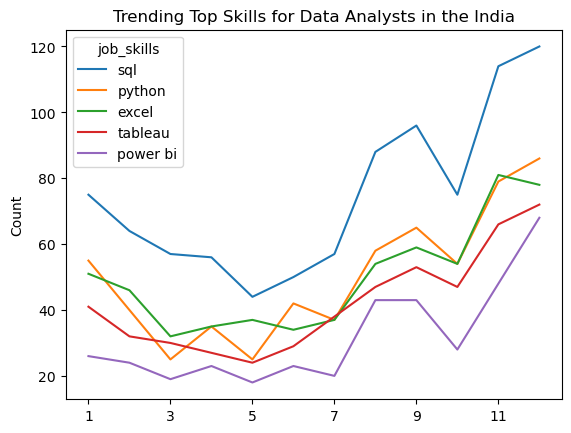

In [6]:
df_DA_US_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in the India')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [7]:
DA_totals = df_DA_US.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1     144
2     118
3      97
4      99
5      64
6      93
7      92
8     141
9     166
10    126
11    204
12    195
dtype: int64

In [8]:
df_DA_US_percent = df_DA_US_pivot.iloc[:12].div(DA_totals/100, axis=0)

df_DA_US_percent = df_DA_US_percent.reset_index()
df_DA_US_percent['job_posted_month'] = df_DA_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_US_percent = df_DA_US_percent.set_index('job_posted_month')
df_DA_US_percent = df_DA_US_percent.drop(columns='job_posted_month_no')

df_DA_US_percent

job_skills,sql,python,excel,tableau,power bi,sas,r,aws,azure,javascript,...,react.js,swift,ringcentral,suse,jupyter,sqlite,ggplot2,gitlab,graphql,no-sql
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,52.083333,38.194444,35.416667,28.472222,18.055556,25.000000,15.972222,4.166667,3.472222,7.638889,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.694444,0.000000
Feb,54.237288,33.898305,38.983051,27.118644,20.338983,11.864407,19.491525,5.084746,5.932203,6.779661,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.847458,0.000000,0.000000,0.000000
Mar,58.762887,25.773196,32.989691,30.927835,19.587629,10.309278,9.278351,7.216495,6.185567,3.092784,...,0.000000,1.030928,0.000000,1.030928,0.00000,0.000000,0.000000,0.000000,0.000000,1.030928
Apr,56.565657,35.353535,35.353535,27.272727,23.232323,24.242424,16.161616,4.040404,8.080808,7.070707,...,1.010101,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.010101,0.000000,0.000000
May,68.750000,39.062500,57.812500,37.500000,28.125000,15.625000,14.062500,6.250000,14.062500,4.687500,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,53.763441,45.161290,36.559140,31.182796,24.731183,30.107527,24.731183,10.752688,9.677419,5.376344,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,61.956522,40.217391,40.217391,41.304348,21.739130,21.739130,25.000000,5.434783,8.695652,5.434783,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,62.411348,41.134752,38.297872,33.333333,30.496454,17.021277,19.858156,14.184397,7.801418,4.964539,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,57.831325,39.156627,35.542169,31.927711,25.903614,15.662651,16.265060,7.228916,3.012048,8.433735,...,0.000000,0.000000,0.000000,0.000000,0.60241,0.000000,0.000000,0.000000,0.000000,0.000000


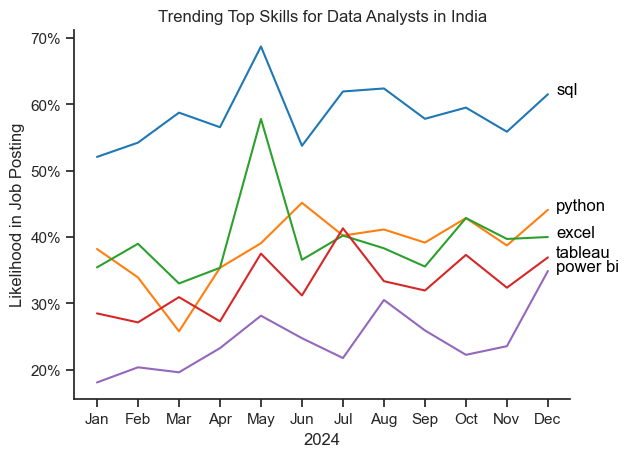

In [12]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_US_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Analysts in India')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2024')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()